<a href="https://colab.research.google.com/github/tetiana-kholod/exploratory-data-analysis/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This project performs end-to-end data cleaning and exploratory analysis of a company’s global sales dataset.
The dataset includes three tables  
events.csv (sales over several years),  
products.csv (product categories and codes), and  
countries.csv (country / region codes).   
The main objective is to clean and validate the data, compute core business metrics, and produce actionable insights supported by visualizations in Google Colab.

Цей проєкт охоплює повний цикл очищення даних та їх дослідницького аналізу на основі глобального набору даних про продажі компанії. Набір даних містить три таблиці:

events.csv — дані про продажі за кілька років

products.csv — категорії товарів та їхні коди

countries.csv — коди країн і регіонів

Основна мета — очистити та перевірити дані, розрахувати ключові бізнес-метрики та сформувати практичні інсайти, підкріплені візуалізаціями в Google Colab.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from google.colab import drive
drive.mount ("/content/drive") #connecting Google Drive
%cd /content/drive/MyDrive/Mate_Academy
#changing work folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_Academy


In [ ]:
countries = pd.read_csv("countries.csv") #import CSV file
countries.head() #returning 5 raws

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
countries.isna().sum() #number of missing values

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [ ]:
countries.isna().sum() / countries.shape[0] * 100 #percent of missing values

,0
name,0
alpha-2,0
alpha-3,0
region,0
sub-region,0


In [ ]:
print(countries[countries["region"].isna()]) #all raws with missing values in column "region"

         name alpha-2 alpha-3 region sub-region
8  Antarctica      AQ     ATA    NaN        NaN


In [ ]:
print(countries[countries["name"] == "Antarctica"]) #all raws with value "Antarctica" in column "name"

         name alpha-2 alpha-3 region sub-region
8  Antarctica      AQ     ATA    NaN        NaN


In [ ]:
print(countries[countries["alpha-2"].isna()])

        name alpha-2 alpha-3  region          sub-region
153  Namibia     NaN     NAM  Africa  Sub-Saharan Africa


###We can leave a table "countries" with missing values. They will not affect the analysis in the future. It is unlikely that sales were made in Antarctica. The absence of "alpha-2" for Namibia is not critical (joining of tables will be carried out according to the "alpha-3" column).
Можна залишити таблицю countries із пропущеними значеннями. Вони не впливатимуть в подальшому на аналіз. Навряд чи здійснювались продажі в Антарктиці. Відсутність "alpha-2" для Намібії не є критичним (об'єднання таблицб буде здійснюватись по колонці "alpha-3").  



In [ ]:
products = pd.read_csv("products.csv") #import CSV file
products.head() #returning 5 raws

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


###The table products has no missing values. The types of data in the columns are appropriat
Таблиця products не має пропущених значень. Типи даних в колонках є відповідними.  


In [ ]:
events = pd.read_csv("events.csv") #import CSV file
events.head(1) #returning 1 raw

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650,206,117


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


###I consider it necessary to delete raws that do not contain data in the units_sold column. The information contained in them is not essential, given the context of the data.
###The absence of values in the Country Code column will be taken into account in the future when analyzing metrics with a breakdown by country/region.
Вважаю за потрібне видалити рядки, які  не містять дані в колонці units_sold. Інформація, що міститься в них є не суттєвою, враховуючи контекст даних.  
Відсутність значень в колонці Country Code буде враховано в подальшому при проведенні аналізу метрік з розподілом по країнам/регіонам.  



In [ ]:
events.dropna(subset=["Units Sold"], inplace = True) # to delete raws with empty cells in columns Units Sold
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"]) # changing data type
events["Ship Date"] = pd.to_datetime(events["Ship Date"]) #changing data type
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


###Data types are appropriate.
Типи даних є відповідними.  



In [ ]:
products.columns = products.columns.str.replace("id", "Product ID") #changing name of column
sales = pd.merge(events, products, on = "Product ID", how = "inner") #joining tables "events" and "products"
sales.head(1)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650,206,117,Cereal


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  item_type       1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 114.3+ KB


In [ ]:
countries.columns = countries.columns.str.replace("alpha-3", "Country Code") #changing name of column
sales = pd.merge(sales, countries, on = "Country Code", how = "left") #joining of tables "sales" and "countries"
sales.head(1) #returning of 1 raw

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650,206,117,Cereal,Norway,NO,Europe,Northern Europe


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  item_type       1328 non-null   object        
 11  name            1246 non-null   object        
 12  alpha-2         1246 non-null   object        
 13  region          1246 non-null   object        
 14  sub-region      1246 non-null   object        
dtypes: d

In [ ]:
sales.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,"1,328",1328,1328,"1,328","1,328","1,328","1,328"
mean,"541,623,125",2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,"5,788","4,952",265,187
min,"100,640,618",2010-01-01 00:00:00,2010-01-10 00:00:00,"1,270",2,9,7
25%,"321,329,128",2011-12-14 06:00:00,2012-01-02 00:00:00,"3,127","2,357",82,36
50%,"539,992,463",2013-10-15 12:00:00,2013-11-05 12:00:00,"5,988","4,962",154,97
75%,"754,735,696",2015-08-29 12:00:00,2015-10-04 18:00:00,"8,681","7,460",437,263
max,"999,879,729",2017-07-23 00:00:00,2017-08-31 00:00:00,"8,969","9,999",668,525
std,"257,349,633",NaN,NaN,"2,821","2,905",217,176


In [ ]:
# For all object-type columns, remove extra spaces and convert strings to lowercase
for col in sales.select_dtypes(include=["object"]).columns:
    sales[col] = sales[col].map(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [ ]:
print(sales.duplicated().sum()) # number of duplicated raws

0


In [ ]:
sales["Revenue"] = sales["Units Sold"] * sales["Unit Price"] # to add new column "Revenue"

In [ ]:
sales["Total Cost"] = sales["Units Sold"] * sales["Unit Cost"] # to add new column "Total Cost"

In [ ]:
sales["Profit"] = sales["Revenue"] - sales["Total Cost"] # to add new column "Profit"

In [ ]:
sales.head(1) # to return 1 raw

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region,Revenue,Total Cost,Profit
0,100640618,2014-10-08,2014-10-18,m,nor,2103,online,650,206,117,cereal,norway,no,europe,northern europe,"133,705","76,122","57,584"


In [ ]:
sales_cleaned = sales.drop(["Country Code", "Product ID", "alpha-2"], axis=1) # to delete columns "Country Code", "Product ID", "alpha-2"
sales_cleaned.head(1) # to return(show) 1 raw

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,region,sub-region,Revenue,Total Cost,Profit
0,100640618,2014-10-08,2014-10-18,m,online,650,206,117,cereal,norway,europe,northern europe,"133,705","76,122","57,584"


In [ ]:
sales_cleaned["name"] = sales_cleaned["name"].str.title() # to capitalize first letter of each word
sales_cleaned["region"] = sales_cleaned["region"].str.title() # to capitalize first letter of each word
sales_cleaned["sub-region"] = sales_cleaned["sub-region"].str.title() # to capitalize first letter of each word

# Standardize column names (snake_case): make them lowercase, replace spaces with underscores, and replace hyphens with underscores
sales_cleaned.columns = sales_cleaned.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

sales_cleaned.head(2) # to return(show) 2 raws

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,item_type,name,region,sub_region,revenue,total_cost,profit
0,100640618,2014-10-08,2014-10-18,m,online,650,206,117,cereal,Norway,Europe,Northern Europe,"133,705","76,122","57,584"
1,100983083,2016-08-11,2016-08-11,c,offline,"1,993",206,117,cereal,Serbia,Europe,Southern Europe,"409,960","233,400","176,560"


In [ ]:
# metrics
print("The main metrics of sales during reporting periods are the folowing:")
print(f"Total revenue, USD: {sales_cleaned['revenue'].sum()}")
print(f"Total profit, USD: {sales_cleaned['profit'].sum()}")
print(f"Orders number: {sales_cleaned['order_id'].count()}")
print(f"Units sold: {sales_cleaned['units_sold'].sum()}")
# print(f"Average number of units sold per order: {round(sales_cleaned['units_sold'].sum() / sales_cleaned['order_id'].count()), 0}")
print(f"Average number of units sold per order: {round(sales_cleaned['units_sold'].mean(), 0)}")
print(f"Number of countries outreached: {sales_cleaned['name'].nunique()}")
print(f"Number of regions outreached: {sales_cleaned['region'].nunique()}")

The main metrics of sales during reporting periods are the folowing:
Total revenue, USD: 1702129408.21
Total profit, USD: 501434459.0
Orders number: 1328
Units sold: 6576524.0
Average number of units sold per order: 4952.0
Number of countries outreached: 45
Number of regions outreached: 2


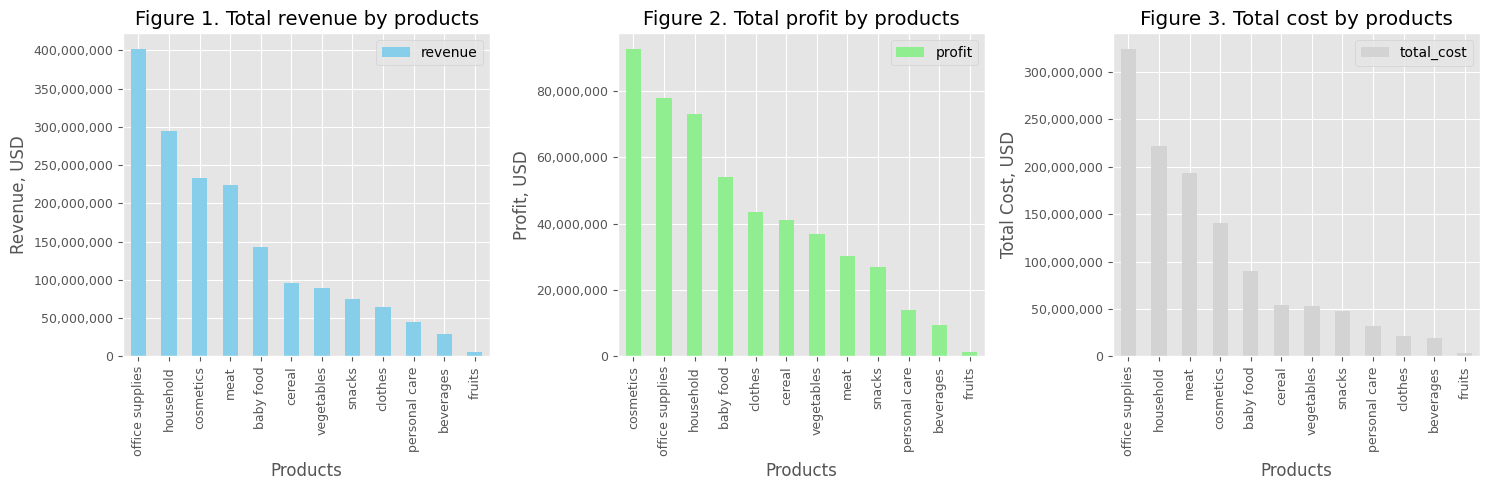

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

# First subplot - Total revenue by products
sales_cleaned.groupby("item_type")["revenue"].sum().reset_index().sort_values(by="revenue", ascending = False).plot(x = "item_type", y = "revenue", kind = "bar", ax = ax[0], color = "skyblue")
ax[0].set_title("Figure 1. Total revenue by products", fontsize = 14)
ax[0].set_xlabel("Products", fontsize = 12)
ax[0].set_ylabel("Revenue, USD", fontsize = 12)
ax[0].tick_params(axis="x", rotation=90)
ax[0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax[0].tick_params(axis="both", labelsize=9)

# Second subplot - Total profit by products
sales_cleaned.groupby("item_type")["profit"].sum().reset_index().sort_values(by="profit", ascending = False).plot(x = "item_type", y = "profit", kind = "bar", ax = ax[1], color = "lightgreen")
ax[1].set_title("Figure 2. Total profit by products", fontsize = 14)
ax[1].set_xlabel("Products", fontsize = 12)
ax[1].set_ylabel("Profit, USD", fontsize = 12)
ax[1].tick_params(axis="x", rotation=90)
ax[1].tick_params(axis="both", labelsize=9)
ax[1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

# Third subplot - Total cost by products
sales_cleaned.groupby("item_type")["total_cost"].sum().reset_index().sort_values(by="total_cost", ascending = False).plot(x = "item_type", y = "total_cost", kind = "bar", ax = ax[2], color = "lightgrey")
ax[2].set_title("Figure 3. Total cost by products")
ax[2].set_xlabel("Products", fontsize = 12)
ax[2].set_ylabel("Total Cost, USD", fontsize = 12)
ax[2].tick_params(axis="x", rotation=90)
ax[2].tick_params(axis="both", labelsize=9)
ax[2].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))


plt.tight_layout()
plt.show()

###The resulting charts make it possible to assess the share of each product group in total revenue, profit, and cost. Despite the fact that the largest revenue came from office equipment sales, the highest profit was generated from cosmetics sales.
The lowest revenue and profit were obtained from fruit sales.
Отримані графіки дозволяють оцінити долю від продажу кожної групи товарів у розмірі загального доходу, прибутку та собівартості. Незважаючи на те, що найбільший дохід надійшов від реалізації офісного обладнання, найбільший прибуток отримано в зв'язку з продажем косметики.   
Найменші дохід та прибуток отримано від реалізації фруктів.  



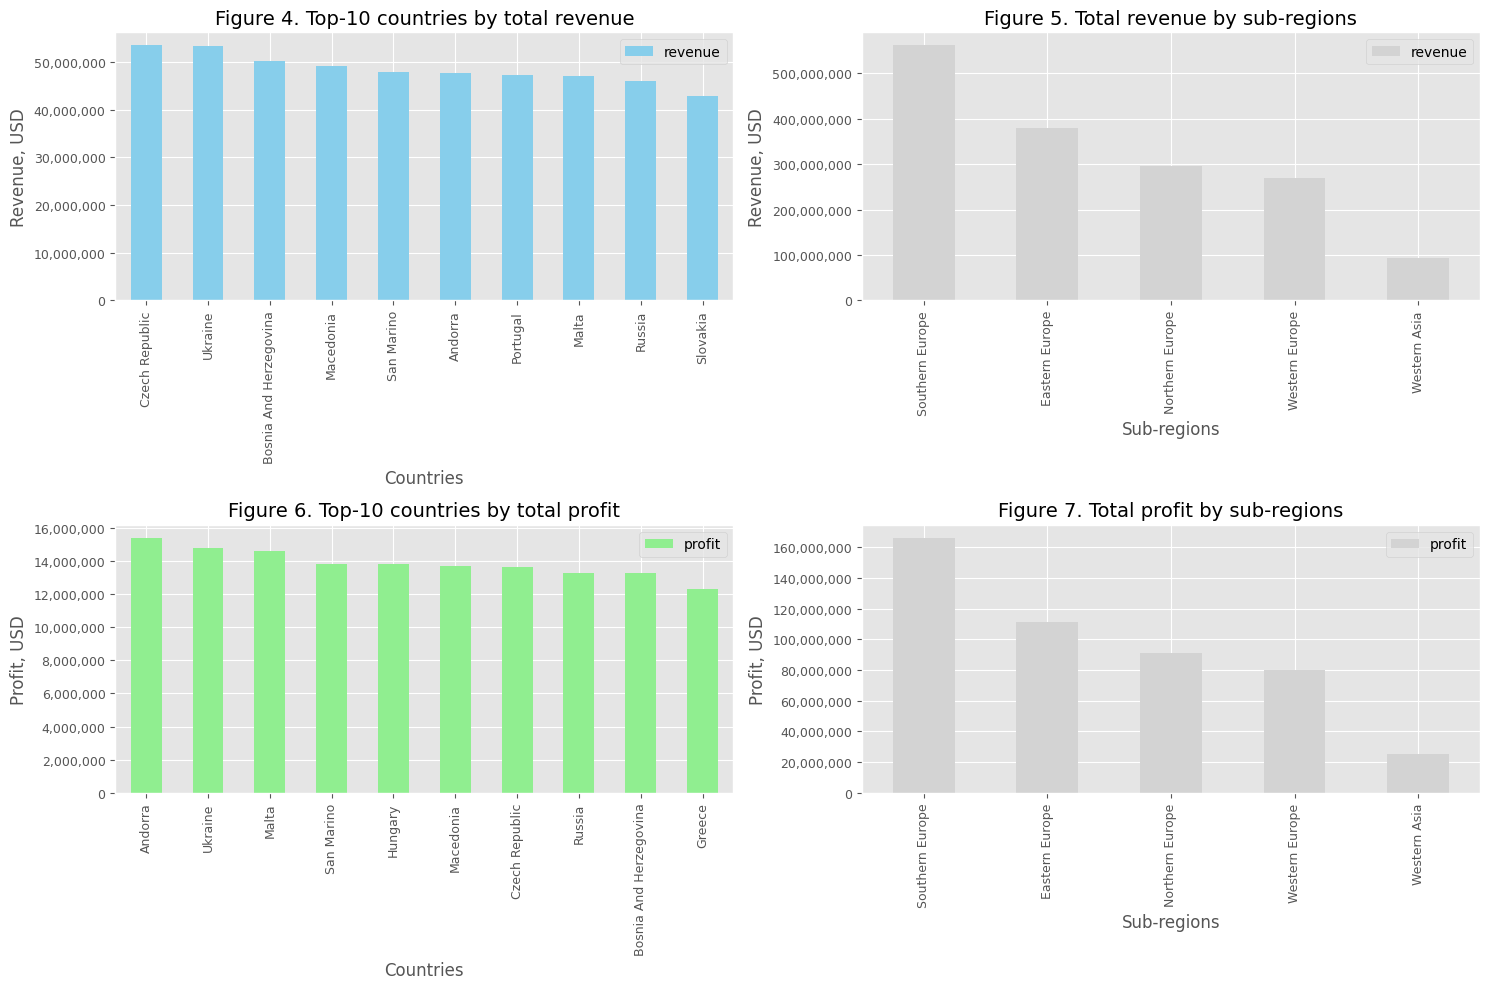

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))


#First subplot - Top-10 countries by total revenue

revenue_by_countries = sales_cleaned.groupby("name")["revenue"].sum().nlargest(10).reset_index().plot(x = "name", y = "revenue", kind = "bar", color = "skyblue", ax = ax[0, 0])
#revenue_by_countries.head(10)
ax[0, 0].set_title("Figure 4. Top-10 countries by total revenue", fontsize = 14)
ax[0, 0].set_xlabel("Countries", fontsize = 12)
ax[0, 0].set_ylabel("Revenue, USD", fontsize = 12)
ax[0, 0].tick_params(axis="x", rotation=90)
ax[0, 0].tick_params(axis="both", labelsize=9)
ax[0, 0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))


#Second subplot - Total revenue by sub-regions

regions = sales_cleaned.groupby("sub_region")["revenue"].sum().reset_index().sort_values(by = "revenue", ascending = False).plot(x="sub_region", y="revenue", kind = "bar", ax=ax[0, 1], color = "lightgrey")

ax[0, 1].set_title("Figure 5. Total revenue by sub-regions", fontsize=14)
ax[0, 1].set_xlabel("Sub-regions", fontsize=12)
ax[0, 1].set_ylabel("Revenue, USD", fontsize=12)
ax[0, 1].tick_params(axis="x", rotation=90)
ax[0, 1].tick_params(axis="both", labelsize=9)
ax[0, 1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

#Third subplot - Top-10 countries by total profit

profit_by_countries = sales_cleaned.groupby("name")["profit"].sum().nlargest(10).reset_index().plot(x = "name", y = "profit", kind = "bar", color = "lightgreen", ax = ax[1, 0])
#revenue_by_countries.head(10)
ax[1, 0].set_title("Figure 6. Top-10 countries by total profit", fontsize = 14)
ax[1, 0].set_xlabel("Countries", fontsize = 12)
ax[1, 0].set_ylabel("Profit, USD", fontsize = 12)
ax[1, 0].tick_params(axis="x", rotation=90)
ax[1, 0].tick_params(axis="both", labelsize=9)
ax[1, 0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))


#Forth subplot - Total profit by sub-regions

regions = sales_cleaned.groupby("sub_region")["profit"].sum().reset_index().sort_values(by = "profit", ascending = False).plot(x="sub_region", y="profit", kind = "bar", ax=ax[1, 1], color = "lightgrey")

ax[1, 1].set_title("Figure 7. Total profit by sub-regions", fontsize=14)
ax[1, 1].set_xlabel("Sub-regions", fontsize=12)
ax[1, 1].set_ylabel("Profit, USD", fontsize=12)
ax[1, 1].tick_params(axis="x", rotation=90)
ax[1, 1].tick_params(axis="both", labelsize=9)
ax[1, 1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()


###The sales of goods by this trading organization are carried out in the territory of Western Asia and across all of Europe. However, the revenue generated from product purchases by consumers in Western Asia accounts for only 6% of the total income. Accordingly, trading activities in European countries brought in 94% of the total revenue, which amounts to USD 1,598,983,761.
In Europe, the highest revenue and profit were obtained from sales within Southern Europe.
When analyzing these indicators by country, it can be noted that the highest revenue was generated from sales to consumers residing in the Czech Republic. At the same time, the highest profit was received from sales to consumers living in Andorra.
Реалізація товарів даною торгівельною організацією здійснюється на території Західної Азії та всієї Європи. При цьому дохід, отриманий від купівлі продукції споживачами Західної Азії, складає лише 6% від загального доходу. Відповідно, торгівельна діяльність в країнах Європи принесла 94% від загальних надходжень, які дорівнюють USD 1,598,983,761.  
В Європі найбільші дохід і прибуток отримані від реалізації товарів в межах Південної Європи.
Якщо аналізувати такі показники в розрізі країн, то можна відмітити, що найбільший дохід було отримано від продажу споживачам, які мешкають в Чеській республіці. В той же час найбільший прибуток надійшов від реалізації товарів споживачам, які мешкають в Андоррі.  




In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

sales_regions_pivot = pd.pivot_table(
    sales_cleaned,
    values="revenue",
    index="item_type",
    columns="region",
    aggfunc="sum",
    margins=True,
    margins_name="Total"
)

grand_total = sales_regions_pivot.loc["Total", "Total"]

percentages = (sales_regions_pivot.loc["Total"] / grand_total) * 100

sales_regions_pivot.loc["Percent"] = percentages
print(sales_regions_pivot)

region                Asia        Europe         Total
item_type                                             
baby food        5,072,924   128,761,445   133,834,369
beverages          711,513    26,714,160    27,425,673
cereal           5,445,908    89,230,809    94,676,716
clothes          4,559,489    58,747,835    63,307,325
cosmetics        1,252,141   220,053,253   221,305,394
fruits             466,509     4,488,980     4,955,490
household       18,970,849   259,903,568   278,874,417
meat            31,460,337   169,879,493   201,339,830
office supplies  7,227,129   371,439,113   378,666,242
personal care    3,824,882    39,521,441    43,346,323
snacks           8,998,100    60,215,392    69,213,492
vegetables       5,341,106    76,697,384    82,038,491
Total           93,330,887 1,505,652,874 1,598,983,761
Percent                  6            94           100


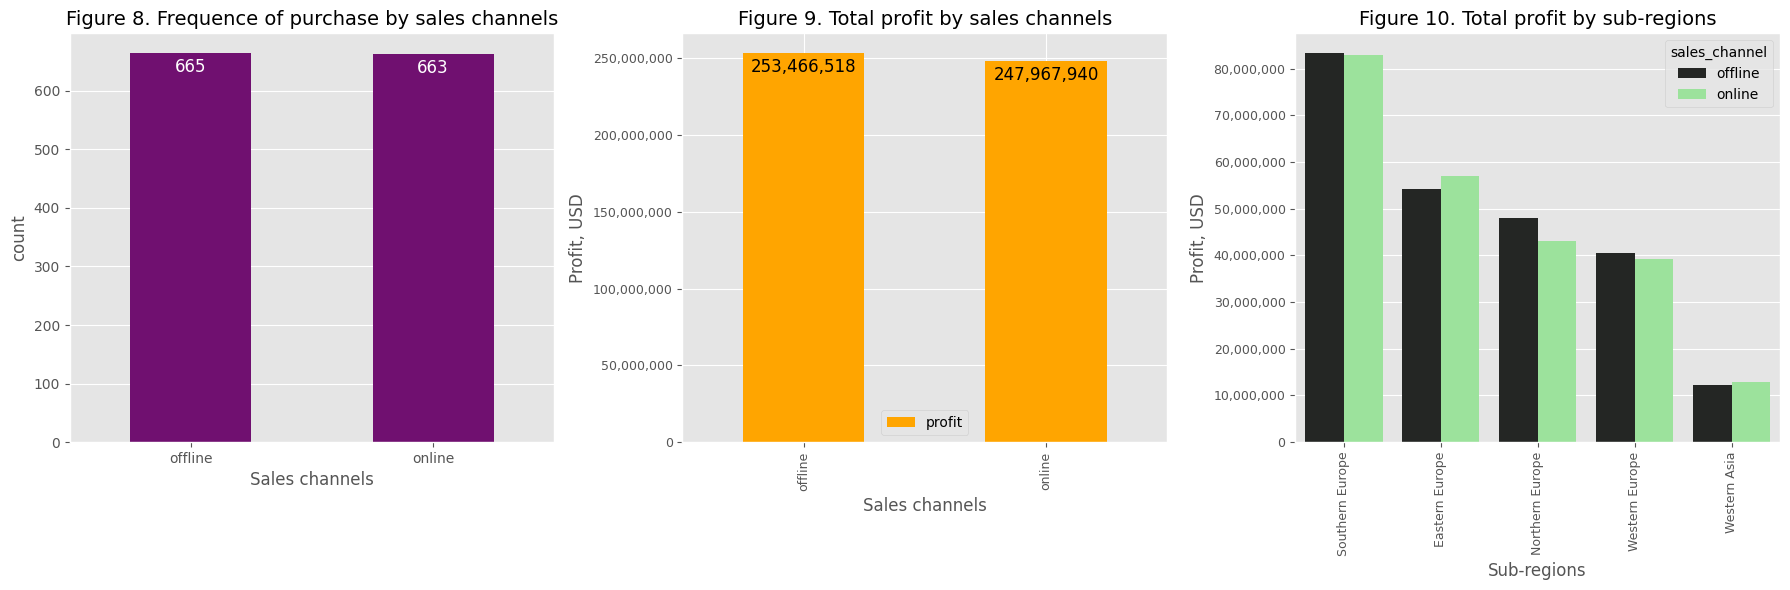

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))

#first subplot - Histohrama on frequency of online and ofline orders
order = sales_cleaned['sales_channel'].value_counts().index
sns.countplot(data=sales_cleaned, x="sales_channel", ax=ax[0], color="purple", width=0.5, order = order)
ax[0].set_title("Figure 8. Frequence of purchase by sales channels", fontsize = 14)
ax[0].set_xlabel("Sales channels", fontsize = 12)
for bar in ax[0].patches:
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 40,
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        color="white",
        fontsize=12,
        )


#second subplot - Profit by sales channels

sales_cleaned.groupby("sales_channel")["profit"].sum().reset_index().sort_values(by = "profit", ascending = False).plot(kind = "bar", x = "sales_channel", y = "profit", color = "orange", ax = ax[1])
ax[1].set_title("Figure 9. Total profit by sales channels", fontsize = 14)
ax[1].set_xlabel("Sales channels", fontsize = 12)
ax[1].set_ylabel("Profit, USD", fontsize = 12)
ax[1].tick_params(axis="both", labelsize=9)
ax[1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
for bar in ax[1].patches:
    ax[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 15000000,
        f"{int(bar.get_height()):,}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=12,
        )

#third subplot - Profit by sub-regions and sales channels

subregions_by_sales_channels = sales_cleaned.groupby(["sub_region", "sales_channel"])["profit"].sum().reset_index().sort_values(by = "profit", ascending = False)
sns.barplot(data = subregions_by_sales_channels, x = "sub_region", y = "profit", hue = "sales_channel", ax=ax[2], palette='dark:lightgreen', errorbar = ("ci", None))

ax[2].set_title("Figure 10. Total profit by sub-regions", fontsize=14)
ax[2].set_xlabel("Sub-regions", fontsize=12)
ax[2].set_ylabel("Profit, USD", fontsize=12)
ax[2].tick_params(axis="x", rotation=90)
ax[2].tick_params(axis="both", labelsize=9)
ax[2].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()

###The indicators of the number of sales in terms of sales channels do not differ significantly. Although, it should be noted that in general, the amount of profit received from the sale of goods offline exceeds the amount of profit from online sales. This ratio is also characteristic of Eastern Europe. While Northern European consumers brought more profit from online purchases.
Суттєво не відрізняються показники кількості продажів в розрізі каналів продажу. Хоча, слід зазначити, що в цілому розмір прибутку, отриманого від реалізації товарів офлайн перевищує розмір прибутку від продажі онлайн. Таке співвідношення характерно і для Східної Європи. В той час, як споживачі Північної Європи принесли більше прибутку, купуючи онлайн.  



In [ ]:
sales_cleaned["days_to_ship"] = sales_cleaned["ship_date"] - sales_cleaned["order_date"]
sales_cleaned.head(1)

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,item_type,name,region,sub_region,revenue,total_cost,profit,days_to_ship
0,100640618,2014-10-08,2014-10-18,m,online,650,206,117,cereal,Norway,Europe,Northern Europe,"133,705","76,122","57,584",10 days


In [ ]:
#sales_cleaned["days_to_ship"].value_counts()

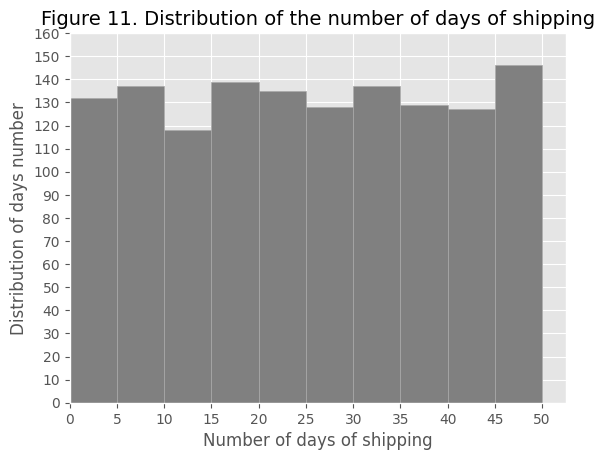

In [ ]:
sales_cleaned["days_to_ship_num"] = sales_cleaned["days_to_ship"].dt.days

plt.hist(sales_cleaned["days_to_ship_num"], bins = 10, color="grey", edgecolor="darkgrey")
plt.title("Figure 11. Distribution of the number of days of shipping", fontsize = 14)
plt.xlabel("Number of days of shipping")
plt.ylabel("Distribution of days number")
x_ticks = np.arange(0, sales_cleaned["days_to_ship_num"].max() + 5, 5)
plt.xticks(x_ticks)
plt.xlim(left=0)
y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 10, 10)
plt.yticks(y_ticks)
plt.style.use("ggplot")
#plt.grid(True)
plt.show()

###Throughout the analyzed period, the number of days from order to shipment reached up to 50 days. Specifically, more than 140 orders were shipped 45–50 days after being placed. The distribution of such periods can be seen in the figure 11.
За весь період, що аналізується, кількість днів від замовлення до відправки сягала 50 днів. Так, більше 140 замовлень було відправлено через 45-50 днів після замовлення. З розподілом тривалості таких періодів можна ознайомитись на малюнку 11.   



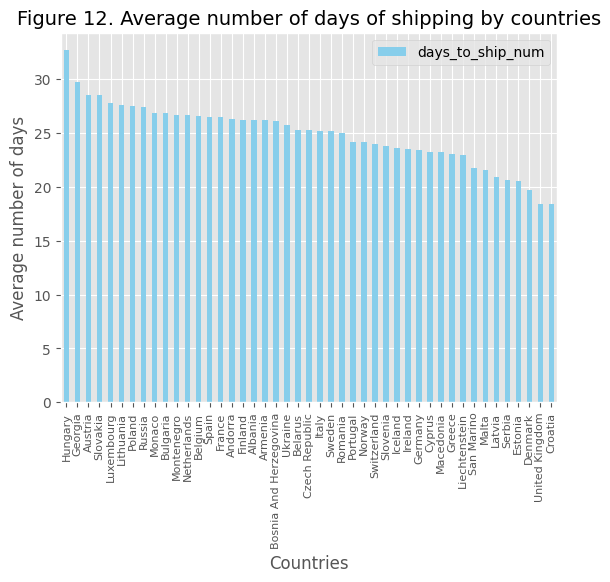

In [ ]:
sales_cleaned.groupby("name")["days_to_ship_num"].mean().reset_index().sort_values(by = "days_to_ship_num", ascending = False).plot(x = "name", y = "days_to_ship_num", kind = "bar", color = "skyblue")
plt.title("Figure 12. Average number of days of shipping by countries", fontsize = 14)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Average number of days", fontsize = 12)
plt.tick_params(axis = "x", rotation = 90, labelsize = 8)
plt.show()

###The longest average shipping time was in Hungary, while the shortest was in Croatia.
Найдовший середній період відправки товарів був в Угорщині, найкоротший - у Хорватії.

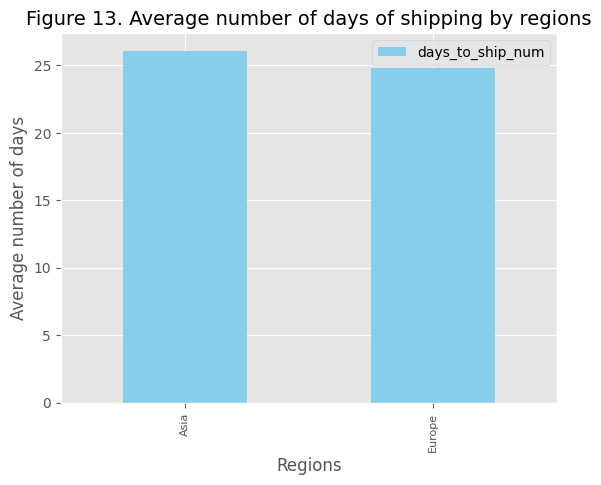

In [ ]:
sales_cleaned.groupby("region")["days_to_ship_num"].mean().reset_index().sort_values(by = "days_to_ship_num", ascending = False).plot(x = "region", y = "days_to_ship_num", kind = "bar", color = "skyblue")
plt.title("Figure 13. Average number of days of shipping by regions", fontsize = 14)
plt.xlabel("Regions", fontsize = 12)
plt.ylabel("Average number of days", fontsize = 12)
plt.tick_params(axis = "x", rotation = 90, labelsize = 8)
plt.show()

###The average number of days from order to shipment across regions shows almost no variation and is approximately 25 days.
Середня кількість днів від замовлення до відправки в розрізі регіонів майже не відрізняється та складає близька 25 днів.  



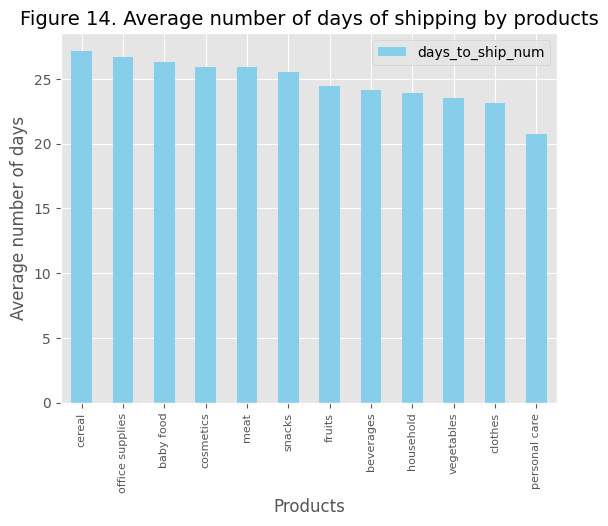

In [ ]:
sales_cleaned.groupby("item_type")["days_to_ship_num"].mean().reset_index().sort_values(by = "days_to_ship_num", ascending = False).plot(x = "item_type", y = "days_to_ship_num", kind = "bar", color = "skyblue")
plt.title("Figure 14. Average number of days of shipping by products", fontsize = 14)
plt.xlabel("Products", fontsize = 12)
plt.ylabel("Average number of days", fontsize = 12)
plt.tick_params(axis = "x", rotation = 90, labelsize = 8)
plt.show()

###The average number of days from order to shipment for grains was the highest (over 25 days). Personal care products were shipped the fastest, with an average shipment period of about 20 days.
Середня кількість днів від замовлення до відправки круп була найбільшою (більше 25 днів). Швидше за все відправляли товари особистого догляду (середня довжина періоду відправки - близько 20 днів).   



In [ ]:
#sales_cleaned.isna().sum()

In [ ]:
#sales_cleaned["region"].value_counts()

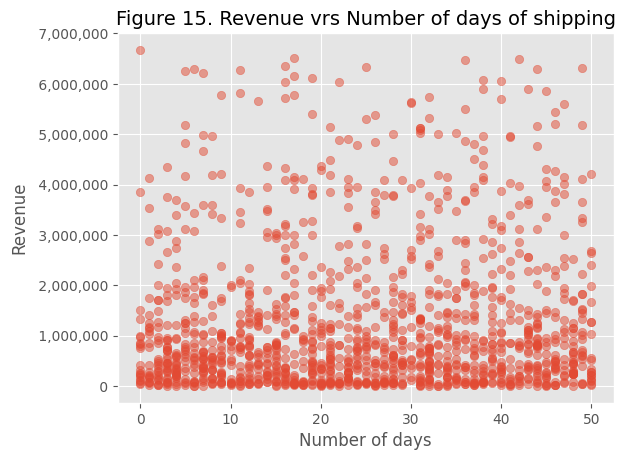

In [ ]:
plt.scatter(sales_cleaned["days_to_ship_num"], sales_cleaned["revenue"], alpha = 0.5)
plt.title("Figure 15. Revenue vrs Number of days of shipping", fontsize = 14)
plt.xlabel("Number of days", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.show()

##"The visualization confirms that there is no direct correlation between profit and the number of days from order to shipment."

### Отримана візуалізація підтверджує відстуність прямого зв'язку між прибутком та кількістю днів від замовлення до відправки.




In [ ]:
products = sales_cleaned["item_type"].unique()
print("products:", products)


products: ['cereal' 'household' 'clothes' 'beverages' 'office supplies' 'fruits'
 'vegetables' 'baby food' 'meat' 'cosmetics' 'snacks' 'personal care']


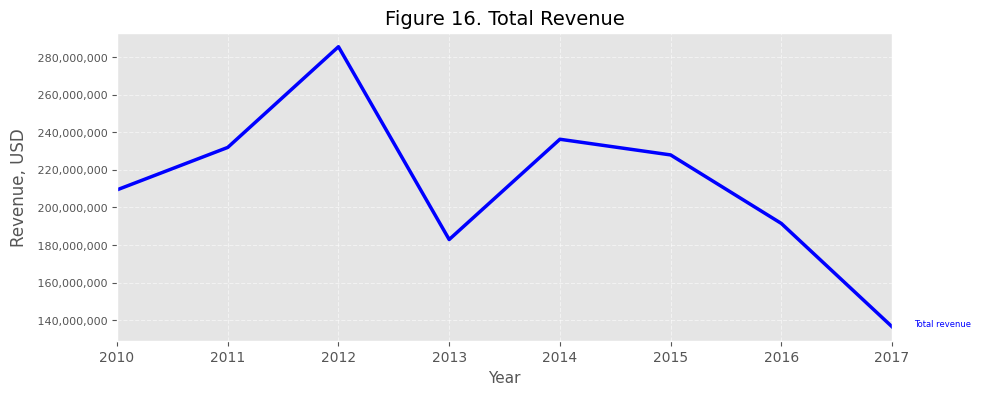

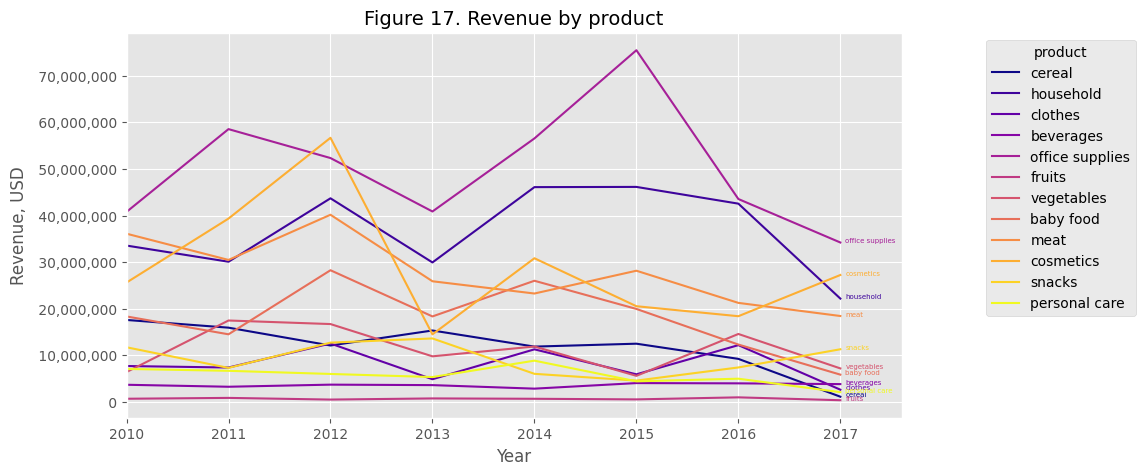

In [ ]:
sales_cleaned["year"] = sales_cleaned["order_date"].dt.year

# line of total revenue
plt.figure(figsize = (10, 4))
total_by_year = sales_cleaned.groupby("year")["revenue"].sum().reset_index()
plt.plot(total_by_year["year"], total_by_year["revenue"], color="blue", linewidth=2.5, label="Total Revenue")
last_year = total_by_year["year"].iloc[-1]
last_value = total_by_year["revenue"].iloc[-1]
plt.text(last_year + 0.2, last_value, "Total revenue", fontsize=6, color="blue")

plt.title("Figure 16. Total Revenue", fontsize=14)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Revenue, USD", fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.grid(True, linestyle="--", alpha=0.5)
plt.tick_params(axis = "y", labelsize = 8)
min_year = sales_cleaned["year"].min()
max_year = sales_cleaned["year"].max()
plt.xlim(min_year, max_year)
plt.show()

#lines of revenue by products
plt.figure(figsize = (10, 5))

#palette = sns.color_palette("tab10", n_colors=len(products))
colors = plt.cm.plasma(np.linspace(0, 1, len(products)))
for i, product in enumerate(products):
  sales_by_product = sales_cleaned[sales_cleaned["item_type"] == product]
  sales_by_product_by_year = sales_by_product.groupby("year")["revenue"].sum().reset_index().sort_values(by = "year")
  plt.plot(sales_by_product_by_year["year"], sales_by_product_by_year["revenue"], color=colors[i], label = product)

  last_year = sales_by_product_by_year["year"].iloc[-1]
  last_value = sales_by_product_by_year["revenue"].iloc[-1]
  plt.text(last_year + 0.05, last_value, product, fontsize=5, color=colors[i])

plt.title(f"Figure 17. Revenue by product", fontsize = 14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Revenue, USD", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.legend(title = "product", bbox_to_anchor=(1.1, 1), loc="upper left")
min_year = sales_cleaned["year"].min()
max_year = sales_cleaned["year"].max()
plt.xlim(min_year, max_year + 0.6)
plt.show()



###The maximum annual revenue (over USD 280,000,000) was recorded in 2012, while the lowest was in 2017 (around USD 140,000,000). The dynamics of revenue by product can be seen in Figure 17.
Максимальний річний дохід (більше USD 280,000,000) надійшов в 2012 році, найменший - в 2017 році (близько USD 140,000,000). З динамікою доходу в розрізі продуктів можна ознайомитись на малюнку 17.   



countries: ['Czech Republic' 'Ukraine' 'Bosnia And Herzegovina' 'Macedonia'
 'San Marino' 'Andorra' 'Portugal' 'Malta' 'Russia' 'Slovakia']


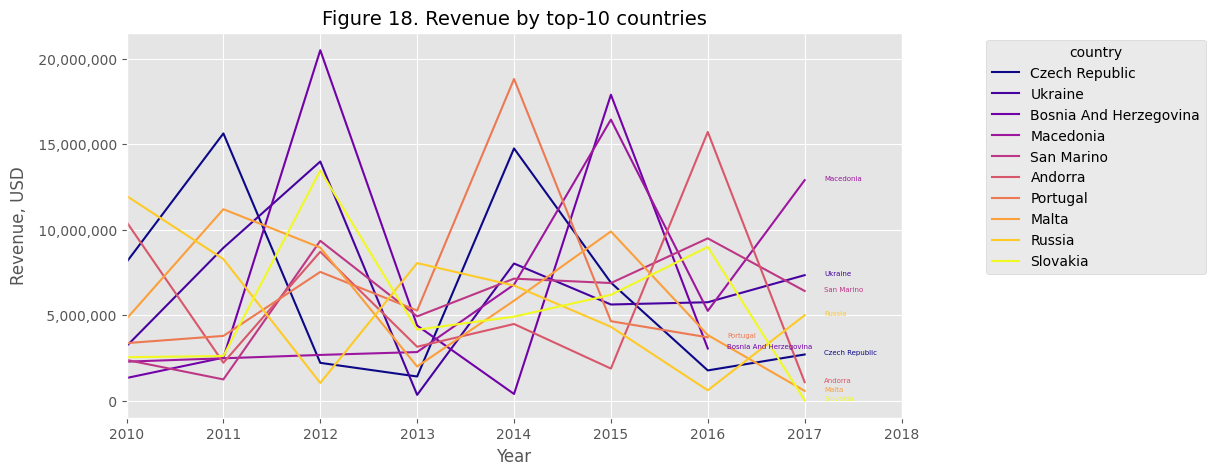

In [ ]:
revenue_by_countries = sales_cleaned.groupby("name")["revenue"].sum().nlargest(10).reset_index()

countries = revenue_by_countries["name"].unique()
print("countries:", countries)

#lines of revenue by countries
plt.figure(figsize = (10, 5))

#palette = sns.color_palette("tab10", n_colors=len(products))
colors = plt.cm.plasma(np.linspace(0, 1, len(countries)))
for i, country in enumerate(countries):
  sales_by_countries = sales_cleaned[sales_cleaned["name"] == country]
  sales_by_countries_by_year = sales_by_countries.groupby("year")["revenue"].sum().reset_index().sort_values(by = "year")
  plt.plot(sales_by_countries_by_year["year"], sales_by_countries_by_year["revenue"], color=colors[i], label = country)

  last_year = sales_by_countries_by_year["year"].iloc[-1]
  last_value = sales_by_countries_by_year["revenue"].iloc[-1]
  plt.text(last_year + 0.2, last_value, country, fontsize=5, color=colors[i])

plt.title(f"Figure 18. Revenue by top-10 countries", fontsize = 14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Revenue, USD", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.legend(title = "country", bbox_to_anchor=(1.1, 1), loc="upper left")
min_year = sales_cleaned["year"].min()
max_year = sales_cleaned["year"].max()
plt.xlim(min_year, max_year + 1)
plt.show()



###Figure 18 shows the revenue dynamics from product sales during the period 2011–2017 across the top 10 countries (ranked by the revenue generated from sales to consumers residing in these countries).
На малюнку 18 зображено динаміку доходу від продажу товарів за період 2011 - 2017 роки в розрізі по топ-10 країнам (за рівнем доходу, отриманого при реалізації продукції споживачам, які проживають у цих країнах).   



regions: ['Europe' nan 'Asia']


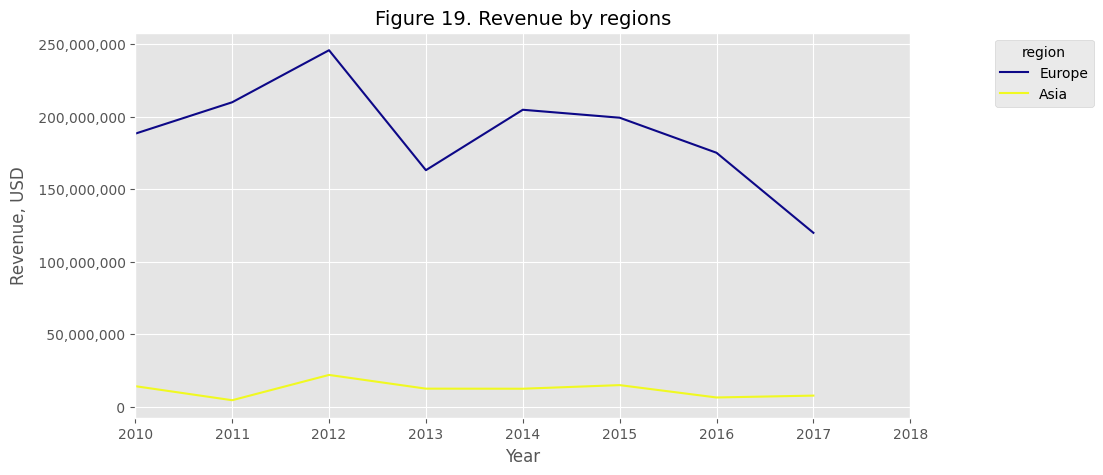

In [ ]:
#revenue_by_regions = sales_cleaned.groupby("region")["revenue"].sum().reset_index()

regions = sales_cleaned["region"].unique()
print("regions:", regions)

#lines of revenue by regions
plt.figure(figsize = (10, 5))

#palette = sns.color_palette("tab10", n_colors=len(products))
colors = plt.cm.plasma(np.linspace(0, 1, len(regions)))
for i, region in enumerate(regions):
  if not pd.isna(region):
      sales_by_regions = sales_cleaned[sales_cleaned["region"] == region]
      sales_by_regions_by_year = sales_by_regions.groupby("year")["revenue"].sum().reset_index().sort_values(by = "year")
      plt.plot(sales_by_regions_by_year["year"], sales_by_regions_by_year["revenue"], color=colors[i], label = region)

  #last_year = sales_by_regions_by_year["year"].iloc[-1]
  #last_value = sales_by_regions_by_year["revenue"].iloc[-1]
  #plt.text(last_year + 0.2, last_value, region, fontsize=5, color=colors[i])

plt.title(f"Figure 19. Revenue by regions", fontsize = 14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Revenue, USD", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.legend(title = "region", bbox_to_anchor=(1.1, 1), loc="upper left")
min_year = sales_cleaned["year"].min()
max_year = sales_cleaned["year"].max()
plt.xlim(min_year, max_year + 1)
plt.show()



sub_regions: ['Northern Europe' 'Southern Europe' nan 'Eastern Europe' 'Western Europe'
 'Western Asia']


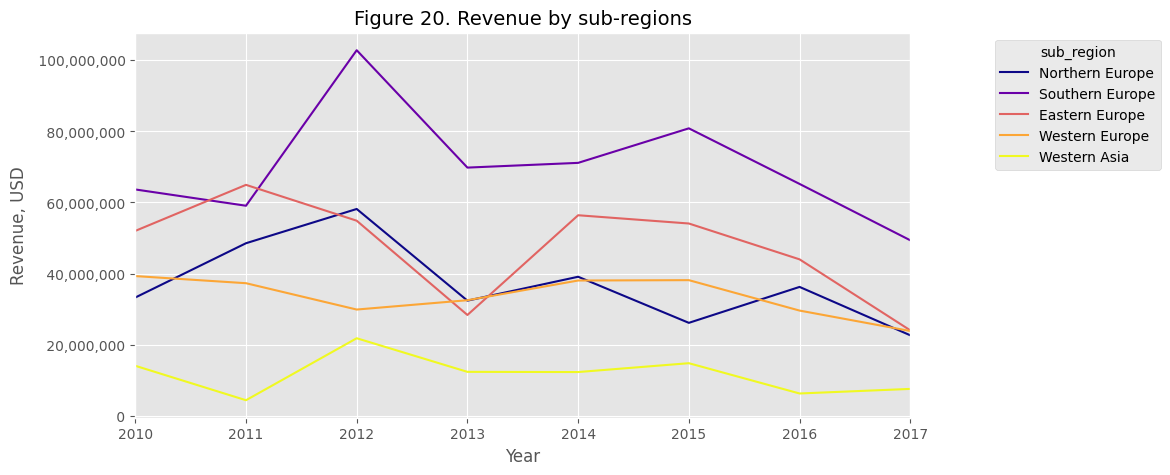

In [ ]:
#revenue_by_regions = sales_cleaned.groupby("region")["revenue"].sum().reset_index()

sub_regions = sales_cleaned["sub_region"].unique()
print("sub_regions:", sub_regions)

#lines of revenue by sub-regions
plt.figure(figsize = (10, 5))

#palette = sns.color_palette("tab10", n_colors=len(sub_regions))
colors = plt.cm.plasma(np.linspace(0, 1, len(sub_regions)))
for i, sub_region in enumerate(sub_regions):
  if not pd.isna(sub_region):
      sales_by_sub_regions = sales_cleaned[sales_cleaned["sub_region"] == sub_region]
      sales_by_sub_regions_by_year = sales_by_sub_regions.groupby("year")["revenue"].sum().reset_index().sort_values(by = "year")
      plt.plot(sales_by_sub_regions_by_year["year"], sales_by_sub_regions_by_year["revenue"], color=colors[i], label = sub_region)

      #last_year = sales_by_sub_regions_by_year["year"].iloc[-1]
      #last_value = sales_by_sub_regions_by_year["revenue"].iloc[-1]
      #plt.text(last_year + 0.2, last_value, sub_region, fontsize=5, color=colors[i])

plt.title(f"Figure 20. Revenue by sub-regions", fontsize = 14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Revenue, USD", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.legend(title = "sub_region", bbox_to_anchor=(1.1, 1), loc="upper left")
min_year = sales_cleaned["year"].min()
max_year = sales_cleaned["year"].max()
plt.xlim(min_year, max_year)
plt.show()



###The revenue dynamics across sub-regions can be viewed in Figure 20.
З динамікою доходу в розрізі суб-регіонів можна ознайомитись на малюнку 20.  


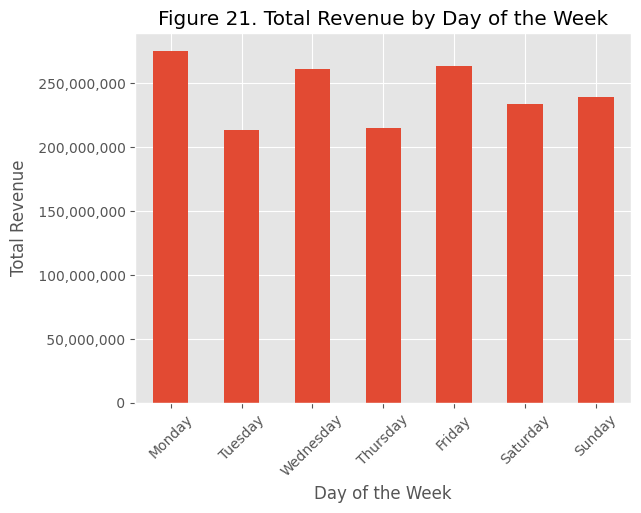

In [ ]:
sales_cleaned["day_of_week"] = sales_cleaned["order_date"].dt.dayofweek
#sales_cleaned.head(1)
day_of_week_sales = sales_cleaned.groupby("day_of_week")["revenue"].sum()
day_of_week_sales.index = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_sales.plot(
    kind="bar",
    xlabel="Day of the Week",
    ylabel="Total Revenue",
    title="Figure 21. Total Revenue by Day of the Week",
)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.show()


###Weekday-based revenue analysis reveals higher income levels on Mondays, Wednesdays, and Fridays, with a noticeable dip on Tuesdays.
Аналіз динаміки доходу в залежності від дня тижня, в який надходило замовлення, показує збільшення рівню доходу в понеділок, середу, п'ятницю та зменшення у вівторок.  



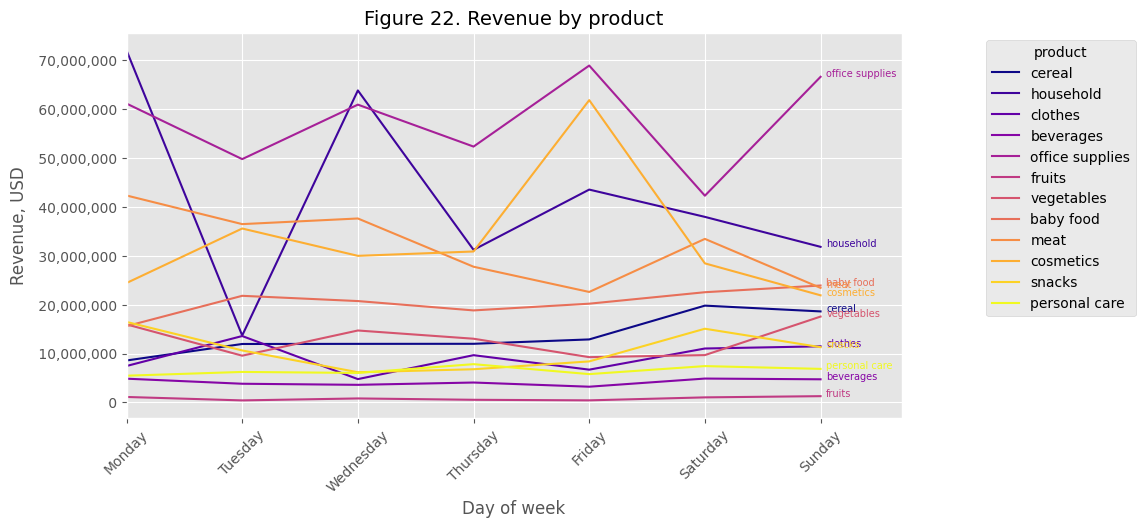

In [ ]:
sales_cleaned["day_of_week"] = sales_cleaned["order_date"].dt.dayofweek
#sales_cleaned.head(1)
products = sales_cleaned["item_type"].unique()
#print("products:", products)
plt.figure(figsize = (10, 5))

#palette = sns.color_palette("tab10", n_colors=len(products))
colors = plt.cm.plasma(np.linspace(0, 1, len(products)))
for i, product in enumerate(products):
  sales_by_product_by_day_of_week = sales_cleaned[sales_cleaned["item_type"] == product]
  sales_by_product_by_day_of_week = sales_by_product_by_day_of_week.groupby("day_of_week")["revenue"].sum().reset_index().sort_values(by = "day_of_week")
  sales_by_product_by_day_of_week.index = [
      "Monday",
      "Tuesday",
      "Wednesday",
      "Thursday",
      "Friday",
      "Saturday",
      "Sunday",
      ]
  plt.plot(sales_by_product_by_day_of_week.index, sales_by_product_by_day_of_week["revenue"], color=colors[i], label = product)

  last_year = sales_by_product_by_day_of_week["day_of_week"].iloc[-1]
  last_value = sales_by_product_by_day_of_week["revenue"].iloc[-1]
  plt.text(last_year + 0.05, last_value, product, fontsize=7, color=colors[i])

plt.title(f"Figure 22. Revenue by product", fontsize = 14)
plt.xlabel("Day of week", fontsize = 12)
plt.ylabel("Revenue, USD", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.legend(title = "product", bbox_to_anchor=(1.1, 1), loc="upper left")
min_year = sales_cleaned["day_of_week"].min()
max_year = sales_cleaned["day_of_week"].max()
plt.xlim(min_year, max_year + 0.7)

plt.xticks(rotation=45)
plt.show()


###The weekday revenue dynamics are primarily influenced by demand for office equipment, home goods, and cosmetics. Revenue from these product categories shows significant fluctuations depending on the day of the week. In contrast, sales of other product groups remain relatively stable, without notable peaks or drops.
Найбільше на динаміку доходу в розрізі днів тижня впливає попит на офісне обладнання, товари для дому та косметику. Саме дохід від реалізації товарів цих груп мають суттєвє коливання в залежності від днів тижня. Дохід від продажу товарів інших груп не має значних сплесків та спадів.   



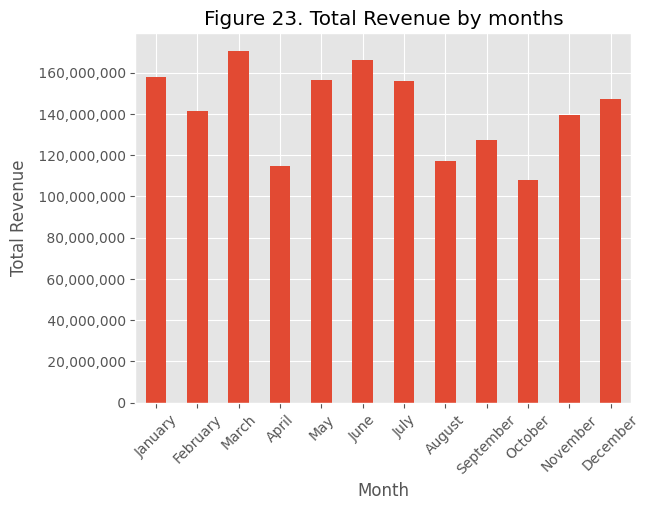

In [ ]:
sales_cleaned["month"] = sales_cleaned["order_date"].dt.month
#sales_cleaned.head(1)
month_sales = sales_cleaned.groupby("month")["revenue"].sum()
month_sales.index = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
month_sales.plot(
    kind="bar",
    xlabel="Month",
    ylabel="Total Revenue",
    title="Figure 23. Total Revenue by months",
)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.show()


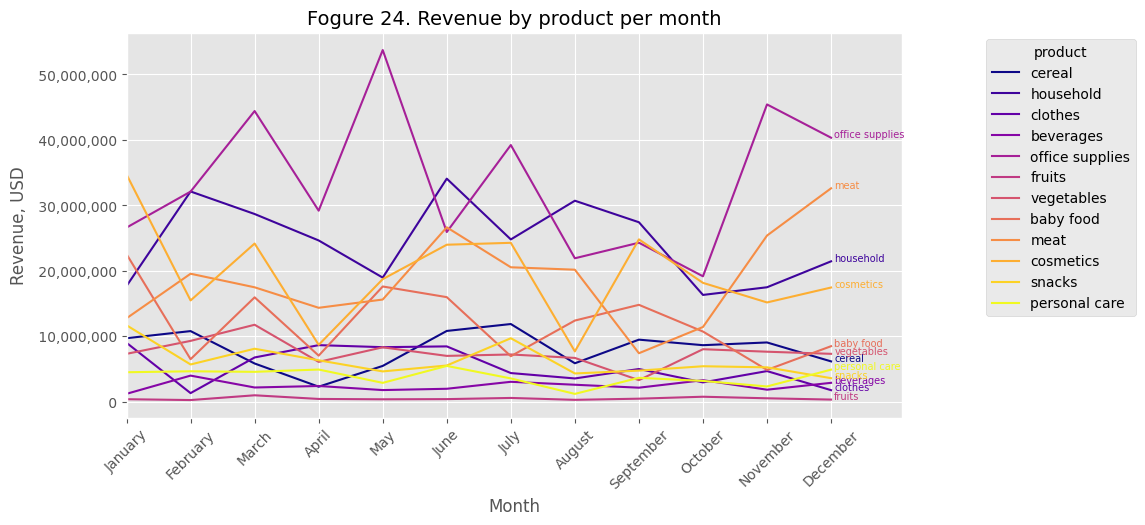

In [ ]:
#sales_cleaned.head(1)
products = sales_cleaned["item_type"].unique()
#print("products:", products)
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
plt.figure(figsize = (10, 5))

#palette = sns.color_palette("tab10", n_colors=len(products))
colors = plt.cm.plasma(np.linspace(0, 1, len(products)))
for i, product in enumerate(products):
  sales_by_product = sales_cleaned[sales_cleaned["item_type"] == product]
  sales_by_product_by_month = sales_by_product.groupby("month")["revenue"].sum().reset_index().sort_values(by = "month")

  plt.plot(sales_by_product_by_month["month"], sales_by_product_by_month["revenue"], color=colors[i], label = product)

  last_month = sales_by_product_by_month["month"].iloc[-1]
  last_value = sales_by_product_by_month["revenue"].iloc[-1]
  plt.text(last_month + 0.05, last_value, product, fontsize=7, color=colors[i])

plt.title("Fogure 24. Revenue by product per month", fontsize = 14)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Revenue, USD", fontsize = 12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x: ,.0f}"))
plt.legend(title = "product", bbox_to_anchor=(1.1, 1), loc="upper left")
min_month = sales_cleaned["month"].min()
max_month = sales_cleaned["month"].max()
plt.xlim(min_month, max_month + 1.1)
plt.xticks(ticks=range(1, 13), labels=[month_names[m] for m in range(1, 13)], rotation=45)

plt.show()


###The analysis of monthly revenue dynamics (Figures 23 and 24) indicates seasonal patterns in consumer activity.
Аналіз динаміки доходу в розрізі по місяцям (малюнки 23, 24) свідчить про сезонність активності споживачів.  



###The analysis of the trading company's performance reveals clear patterns in consumer behavior, reflected in both weekly and seasonal revenue dynamics. The most significant fluctuations in income are driven by products in the categories of office equipment, home goods, and cosmetics, which show strong dependence on the day of the week. Meanwhile, other product groups maintain a stable level of sales without notable peaks.

###Monthly analysis confirms the presence of seasonal demand, offering opportunities for more precise planning of marketing campaigns, inventory management, and staffing. Overall, the company demonstrates consistent operational activity with potential for optimizing product assortment strategies, pricing policies, and expanding sales channels.
Аналіз діяльності торговельного підприємства свідчить про наявність чітких закономірностей у поведінці споживачів, що проявляються як у щотижневій, так і в сезонній динаміці доходу. Найбільший вплив на коливання виручки мають товари категорій офісного обладнання, продукції для дому та косметики, що демонструють значну залежність від дня тижня. Водночас інші товарні групи характеризуються стабільним рівнем продажів без суттєвих сплесків.

Місячний аналіз підтверджує сезонність попиту, що відкриває можливості для більш точного планування маркетингових кампаній, управління запасами та кадрового ресурсу. Загалом, підприємство демонструє стійку операційну активність із потенціалом для оптимізації асортиментної політики, цінових стратегій та розширення каналів збуту.  

